In [ ]:
# Indeed has a link that looks like this:
URL = f'https://www.indeed.com/jobs?q=agricultural%20engineer&start={pagenumber}'

In [51]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [288]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["Location"])
df4 = pd.DataFrame(columns = ["Job_Description"])
df5 = pd.DataFrame(columns = ["Salary (If Available)"])
df6 = pd.DataFrame(columns = ["Link"])


for pagenumber in range(0,10,1):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(pagenumber), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = soup.select("h2 span") 
    # select all span tags under the umbrella of h2 tags 
    companies = soup.find_all(class_ = "companyName")
    locations = soup.find_all(class_ = "companyLocation")
    descriptions = soup.find_all(class_ = "job-snippet")
    salaries = soup.find_all(class_ = "salary-snippet")
    URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})

    for title in titles:
        titles_list = title.text
        # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
        df.loc[len(df.index)] = [titles_list]
        df = df[df.Job_Titles != "new"]
        
    for company in companies:
        company_list = company.text
        df2.loc[len(df2.index)] = [company_list]
        
    for location in locations:
        location_list = location.text
        df3.loc[len(df3.index)] = [location_list]
    
    for description in descriptions:
        description_list = description.text
        df4.loc[len(df4.index)] = [description_list]
        df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '')
        # Another gotcha is that you have to remove the /n in each row- but looping can take considerable more time if we used hundreds of pages
    
    for salary in salaries:
        salary_list = salary.text
        df5.loc[len(df5.index)] = [salary_list]
        
    
    for URL in URLs:
        base = 'www.indeed.com'
        link = URL.attrs['href']
        new_URL = base + link
        df6.loc[len(df6.index)] = [new_URL]



##################
from IPython.display import display, HTML
badabingbadaboom = pd.concat([df, df2, df3, df4, df5, df6], axis=1, join='inner')
display(badabingbadaboom)
badabingbadaboom.to_csv('ABE_career_data.csv')

<ipython-input-288-0f656b4986a5>:38: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '')


,Job_Titles,Company,Location,Job_Description,Salary (If Available),Link
0,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+3 locations",Our primary focus is project based product dev...,"$1,002 a week",www.indeed.com/rc/clk?jk=e1ae7424cf9e2c27&fcci...
1,Industrial Engineer - Agricultural Equipment,RFA Engineering,"Ankeny, IA 50023",Our primary focus is project based product dev...,"$77,488 - $166,502 a year",www.indeed.com/rc/clk?jk=3f952b80cfbe7729&fcci...
2,"Lineboat Deckhand - St. Louis, MO",Archer Daniels Midland Company,"St. Louis, MO",Assisting engineers in maintenance jobs may al...,"$1,002 a week",www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DV...
3,"Freight Conductor- Russell, KY",CSX,"Russell, KY 41169+30 locations","Advance to engineer position when required, ba...","$82,000 - $97,000 a year",www.indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0B4...
4,Research Agricultural Engineer,US Agricultural Research Service,"Mississippi State, MS","For example, an applicant who attains registra...","$65,000 - $85,000 a year",www.indeed.com/rc/clk?jk=1219757cf55928e1&fcci...
5,Agricultural Engineer,"LT Leon Associates, Inc.","Des Moines, IA 50309 (East Village area)",Conduct outreach to provide farmers or others ...,"$68,112 - $88,550 a year","www.indeed.com/company/LT-Leon-Associates,-Inc..."
6,Engineer I/II,Iowa State University,"Ames, IA",The ISU Digital Agriculture Innovation Team (w...,"$65,000 - $90,000 a year",www.indeed.com/rc/clk?jk=d2c33824e9a36f51&fcci...
7,EHS Engineer*,3M,"Ames, IA",Ensuring compliance to all applicable standard...,"$68,112 - $88,550 a year",www.indeed.com/rc/clk?jk=da8e35ddd6b904d2&fcci...
8,Agricultural Scientist/ Engineer,Tetra Tech,Virginia•Remote,Bachelor’s or master’s degree in agricultural ...,"$65,000 - $90,000 a year",www.indeed.com/rc/clk?jk=637345e6fa0d69ee&fcci...
9,Product Development Engineer,John Deere,"Ankeny, IA 50023",This may include possible involvement of other...,"$68,112 - $88,550 a year",www.indeed.com/rc/clk?jk=144faa561eaa054e&fcci...


In [333]:
#!pip install nltk
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize


In [331]:
final_list = []

stop_words = stopwords.words('english')
for row in df4.iterrows():
    words = word_tokenize(row[1]['Job_Description'])
    for word in words:
        if word.lower() not in stop_words:
            if len(word) > 5:
                final_list.append(word)
                
print(final_list)

['primary', 'project', 'product', 'development', 'highway', 'equipment', 'including', 'agricultural', 'construction', 'mining', 'recreational', 'industrial', 'primary', 'project', 'product', 'development', 'highway', 'equipment', 'including', 'agricultural', 'construction', 'mining', 'recreational', 'industrial', 'Assisting', 'engineers', 'maintenance', 'required.This', 'full-time', 'non-exempt', 'position.Locking', 'including', 'preparing', 'barges', 'rigging', 'Advance', 'engineer', 'position', 'required', 'seniority.Review', 'instructions', 'dispatchers', 'transportation', 'employees', 'discuss', 'example', 'applicant', 'attains', 'registration', 'eminence', 'provision', 'manufacturing', 'engineer', 'typically', 'eligible', 'Conduct', 'outreach', 'provide', 'farmers', 'others', 'information', 'improve', 'agricultural', 'productivity', 'conservation', 'efforts', 'Digital', 'Agriculture', 'Innovation', 'www.isudigitalag.org', 'consists', 'professional', 'graduate', 'students', 'closel

Text(0, 0.5, '')

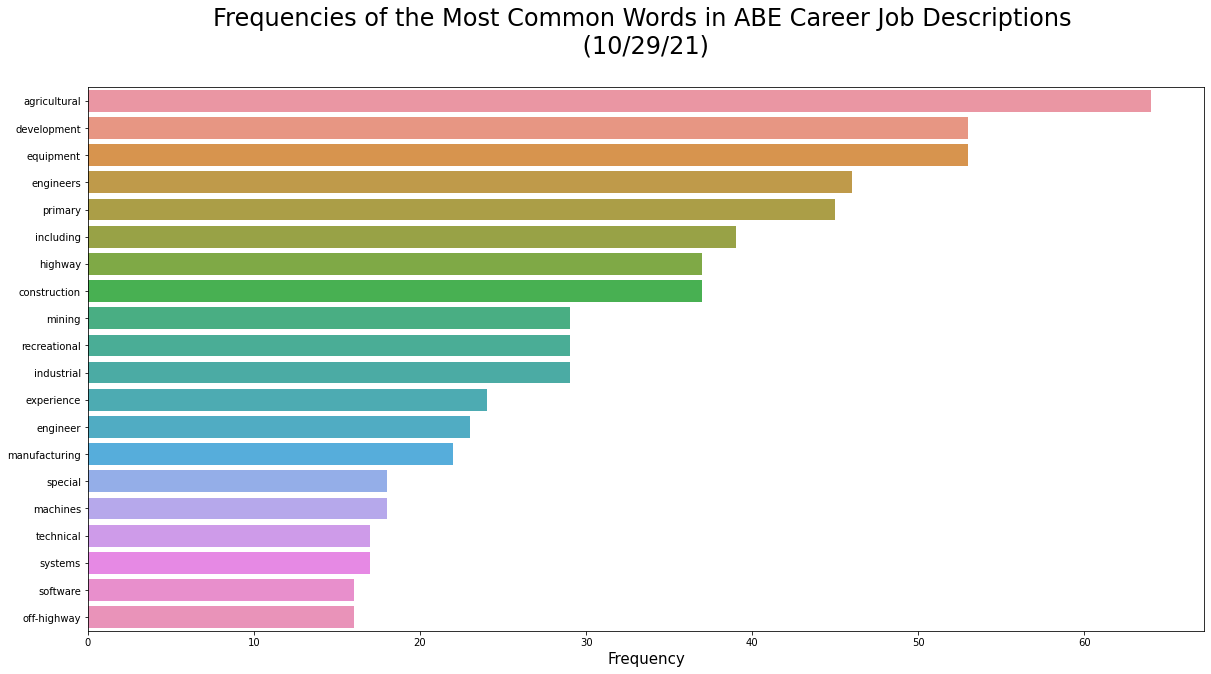

In [352]:
text = nltk.Text(final_list)


all_fdist = nltk.FreqDist(text).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(20,10))

#all_plot = sns.barplot(x = all_fdist.index, y = all_fdist.values, ax=ax)
#plt.xticks(rotation=60);


bar_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, orient='h', ax=ax)
plt.title('Frequencies of the Most Common Words in ABE Career Job Descriptions \n (10/29/21) \n', fontsize = 24)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('', fontsize=16)


In [321]:
from collections import Counter

counter_words = Counter(final_list)
print(counter_words.most_common(200))

[('agricultural', 64), ('development', 53), ('equipment', 53), ('engineers', 46), ('primary', 45), ('including', 39), ('highway', 37), ('construction', 37), ('mining', 29), ('recreational', 29), ('industrial', 29), ('experience', 24), ('engineer', 23), ('manufacturing', 22), ('special', 18), ('machines', 18), ('technical', 17), ('systems', 17), ('software', 16), ('off-highway', 16), ('seeking', 15), ('levels', 15), ('entry-level', 15), ('senior', 15), ('engineers.Our', 15), ('including…', 15), ('customers', 15), ('custom', 14), ('applications', 14), ('project', 11), ('product', 11), ('discuss', 11), ('position', 10), ('required', 10), ('example', 10), ('applicant', 10), ('attains', 10), ('registration', 10), ('eminence', 10), ('provision', 10), ('typically', 10), ('eligible', 10), ('information', 10), ('Digital', 10), ('Agriculture', 10), ('Innovation', 10), ('www.isudigitalag.org', 10), ('consists', 10), ('professional', 10), ('graduate', 10), ('students', 10), ('closely', 10), ('agri

In [289]:
!pip install nbconvert



In [255]:
####################################################################################################
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["Location"])

for pagenumber in range(0,20,5):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(pagenumber), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = soup.select("h2 span") 
    # select all span tags under the umbrella of h2 tags 
    companies = soup.find_all(class_ = "companyName")
    locations = soup.find_all(class_ = "companyLocation")

    for title in titles:
        titles_list = title.text
        # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
        df.loc[len(df.index)] = [titles_list]
        df = df[df.Job_Titles != "new"]
        
    for company in companies:
        company_list = company.text
        df2.loc[len(df2.index)] = [company_list]
        
    for location in locations:
        location_list = location.text
        df3.loc[len(df3.index)] = [location_list]


##################

badabingbadaboom = pd.concat([df, df2, df3], axis=1, join='inner')
display(badabingbadaboom)

,Job_Titles,Company,Location
0,Engineering and Administrative Professional Op...,"Valmont Industries, Inc.","Newton, IA 50208+3 locations"
1,"Maintenance Openings (Nebraska, Indiana, Penns...","Valmont Industries, Inc.","Newton, IA 50208+3 locations"
2,Test Engineer,Emerson,"Marshalltown, IA 50158"
3,"Freight Conductor- Russell, KY",CSX,"Russell, KY 41169+32 locations"
4,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+5 locations"
5,Industrial Engineer - Agricultural Equipment,RFA Engineering,"Ankeny, IA 50023+6 locations"
6,Research Agricultural Engineer,US Agricultural Research Service,"Mississippi State, MS"
7,Agricultural Engineer,"LT Leon Associates, Inc.","Des Moines, IA 50309 (East Village area)"
8,EHS Engineer*,3M,"Ames, IA+7 locations"
9,Engineer I/II,Iowa State University,"Ames, IA+1 location"


In [ ]:
### 
random work and notes below this

In [219]:
print(titles_list)

Project Engineer


In [ ]:
for pagenumber in range(0,1):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(number), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    companies = soup.find_all(class_ = "companyName")
    for company in companies:
        print(company.text)
        

In [201]:
for pagenumber in range(0,1,1):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(number), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = soup.select("h2 span")
    # first do this:
    # print(titles) to see the blob in its most raw format
    for title in titles:
        # do this one second
        # print(title) # to see it organized in a single line format
        print(title.text) # use .text to only get the text part of the html code 

Design Engineer - Self Propelled Sprayers
new
Embedded Software Engineer C++
Research Agricultural Engineer (Research Associate)
Software Development Engineer C++
new
Electronics Assembler
new
Automation Engineer III/IV
Industrial Engineer - Agricultural Equipment - Multiple Open...
Quality Engineer
Structural Engineer II
Engineer I - Embedded Software
Software Quality Assurance Engineer
Designer
new
Entry Level Mechanical Engineer
new
Senior Embedded Software Engineer - Device Drivers
Engineer - Process Development


In [ ]:
company = soup.find_all(class_ = "companyName") 



location = soup.find_all(class_="companyLocation")

In [203]:
for pagenumber in range(0,1):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(number), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    companies = soup.find_all(class_ = "companyName")
    for company in companies:
        print(company.text)
        
        
        
        
        
        

RFA Engineering
RFA Engineering
US Agricultural Research Service
CSX
RFA Engineering
ALMACO
Emerson
Iowa State University
RFA Engineering
RFA Engineering
Sukup Manufacturing
Vermeer Corporation
RFA Engineering
ALMACO
RFA Engineering


In [264]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["Location"])
df4 = pd.DataFrame(columns = ["Job_Description"])
df5 = pd.DataFrame(columns = ["Salary (If Available)"])
df6 = pd.DataFrame(columns = ["Link"])


for pagenumber in range(0,20,5):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(pagenumber), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    titles = soup.select("h2 span") 
    # select all span tags under the umbrella of h2 tags 
    companies = soup.find_all(class_ = "companyName")
    locations = soup.find_all(class_ = "companyLocation")
    descriptions = soup.find_all(class_ = "job-snippet")
    salaries = soup.find_all(class_ = "salary-snippet")

    for title in titles:
        titles_list = title.text
        # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
        df.loc[len(df.index)] = [titles_list]
        df = df[df.Job_Titles != "new"]
        
    for company in companies:
        company_list = company.text
        df2.loc[len(df2.index)] = [company_list]
        
    for location in locations:
        location_list = location.text
        df3.loc[len(df3.index)] = [location_list]
    
    for description in descriptions:
        description_list = description.text
        df4.loc[len(df4.index)] = [description_list]
        df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '')
        # Another gotcha is that you have to remove the /n in each row- but looping can take considerable more time if we used hundreds of pages
    
    for salary in salaries:
        salary_list = salary.text
        df5.loc[len(df5.index)] = [salary_list]
        
    



##################

badabingbadaboom = pd.concat([df, df2, df3, df4, df5], axis=1, join='inner')
display(badabingbadaboom)

<ipython-input-264-fce3a9971a16>:37: FutureWarning: The default value of regex will change from True to False in a future version.
  df4['Job_Description'] = df4['Job_Description'].str.replace(r'\n', '')


,Job_Titles,Company,Location,Job_Description,Salary (If Available)
0,Engineering and Administrative Professional Op...,"Valmont Industries, Inc.","Des Moines, IA+3 locations","Medical, dental and vision insurance.Employer ...","$77,488 - $166,502 a year"
1,Entry Level Software Engineer,RFA Engineering,"Ames, IA 50010+3 locations",Our primary focus is project based product dev...,"$1,002 a week"
2,Test Engineer,Emerson,"Marshalltown, IA 50158",Work effectively in an agile scheduling enviro...,"$65,000 - $85,000 a year"
3,"Welders and Fitters (Nebraska, Oklahoma, Minne...","Valmont Industries, Inc.","Colfax, IA+3 locations",Valmont is currently seeking highly motivated ...,"$82,000 - $97,000 a year"
4,Industrial Engineer - Agricultural Equipment,RFA Engineering,"Ankeny, IA 50023",Our primary focus is project based product dev...,"$68,112 - $88,550 a year"
5,Research Agricultural Engineer,US Agricultural Research Service,"Mississippi State, MS","For example, an applicant who attains registra...","$65,000 - $90,000 a year"
6,Agricultural Engineer,"LT Leon Associates, Inc.","Des Moines, IA 50309 (East Village area)",Conduct outreach to provide farmers or others ...,"$65,000 - $85,000 a year"
7,EHS Engineer*,3M,"Ames, IA",Ensuring compliance to all applicable standard...,"$68,112 - $88,550 a year"
8,Engineer I/II,Iowa State University,"Ames, IA",The ISU Digital Agriculture Innovation Team (w...,"$65,000 - $90,000 a year"
9,Agricultural Scientist/ Engineer,Tetra Tech,Virginia•Remote,Bachelor’s or master’s degree in agricultural ...,"$87,198 - $134,798 a year"


In [279]:
for pagenumber in range(0,20,5):
    r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start={}'.format(pagenumber), headers = headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})
    for URL in URLs:
        link = URL.attrs['href']
        df6.loc[len(df6.index)] = [link]
        print(df6)


                                                Link
0  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
                                                Link
0  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
                                                Link
0  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
2  /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
                                                Link
0  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
2  /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
3  /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
                                                Link
0  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1  /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
2  /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
3  /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYld

                                                 Link
0   /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1   /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
2   /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
3   /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
4   /rc/clk?jk=e1ae7424cf9e2c27&fccid=cd72bba47369...
5   /rc/clk?jk=3f952b80cfbe7729&fccid=cd72bba47369...
6   /rc/clk?jk=1219757cf55928e1&fccid=841a11ac791f...
7   /company/LT-Leon-Associates,-Inc./jobs/Agricul...
8   /rc/clk?jk=da8e35ddd6b904d2&fccid=595d42593839...
9   /rc/clk?jk=d2c33824e9a36f51&fccid=95ffe71a7578...
10  /rc/clk?jk=637345e6fa0d69ee&fccid=997110e6d9c4...
11  /pagead/clk?mo=r&ad=-6NYlbfkN0DXzDzZ1Oulz9LSjz...
12  /rc/clk?jk=50660d9013bf79f5&fccid=c3d73a6fd53e...
13  /rc/clk?jk=144faa561eaa054e&fccid=38eb72d608d8...
14  /rc/clk?jk=712cf8460c9c8829&fccid=846bc1d7e69a...
15  /rc/clk?jk=58696b1392452516&fccid=cd72bba47369...
16  /company/Moeller-Engineering,-LLC/jobs/Enginee...
17  /rc/clk?jk=721d8615decce

                                                 Link
0   /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
1   /pagead/clk?mo=r&ad=-6NYlbfkN0Btxs39KmTzjw_u_h...
2   /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
3   /pagead/clk?mo=r&ad=-6NYlbfkN0B4r7QDcS1FYldRU7...
4   /rc/clk?jk=e1ae7424cf9e2c27&fccid=cd72bba47369...
5   /rc/clk?jk=3f952b80cfbe7729&fccid=cd72bba47369...
6   /rc/clk?jk=1219757cf55928e1&fccid=841a11ac791f...
7   /company/LT-Leon-Associates,-Inc./jobs/Agricul...
8   /rc/clk?jk=da8e35ddd6b904d2&fccid=595d42593839...
9   /rc/clk?jk=d2c33824e9a36f51&fccid=95ffe71a7578...
10  /rc/clk?jk=637345e6fa0d69ee&fccid=997110e6d9c4...
11  /pagead/clk?mo=r&ad=-6NYlbfkN0DXzDzZ1Oulz9LSjz...
12  /rc/clk?jk=50660d9013bf79f5&fccid=c3d73a6fd53e...
13  /rc/clk?jk=144faa561eaa054e&fccid=38eb72d608d8...
14  /rc/clk?jk=712cf8460c9c8829&fccid=846bc1d7e69a...
15  /rc/clk?jk=58696b1392452516&fccid=cd72bba47369...
16  /company/Moeller-Engineering,-LLC/jobs/Enginee...
17  /rc/clk?jk=721d8615decce

In [273]:
    for salary in salaries:
        salary_list = salary.text
        df5.loc[len(df5.index)] = [salary_list]

[]

In [22]:
page = requests.get(URL)
soup = BeautifulSoup(page.text, 'html.parser')
#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())


<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <script id="polyfill-script-bundle">
   /* Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefined)throw TypeError();return e}function SameValueNonNumber(e,n){return e===n}funct

In [24]:
soup = BeautifulSoup(webpage.content, "lxml")

x = soup.find_all("span")
x

[<span id="accessibilityText">Skip to <!-- This is translated before reaching this state --><a class="accessibilityMenu" href="#jobPostingsAnchor" id="skipToJobs">Job Postings</a>, <!-- This is translated before reaching this state --><a class="accessibilityMenu" href="#what" id="skipToSearch">Search</a></span>,
 <span>By using Indeed you agree to our new <a href="/legal?hl=en#privacy" target="_blank">Privacy Policy</a>, <a href="/legal?hl=en#cookies" target="_blank">Cookie Policy</a> and <a href="/legal?hl=en#tos" target="_blank">Terms</a>, which we encourage you to review.</span>,
 <span class="gnav-header-85m0bu esbq1260">Indeed Home</span>,
 <span aria-hidden="false">Sign in</span>,
 <span class="gnav-header-85m0bu esbq1260" id="gnav-header-end" tabindex="-1">Start of main content</span>,
 <span id="hidden_colon" style="display:none">:</span>,
 <span aria-hidden="true" class="icl-TextInput-icon iconRight"><span aria-hidden="true" class=""><svg aria-hidden="true" fill="none" height=

In [28]:
soup.find_all(name='div', attrs={'class':'row'})


[]

In [29]:
print(soup)

<!DOCTYPE html>
<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script id="polyfill-script-bundle">/* Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function CreateDataProperty(e,r,t){var a={value:t,writable:!0,enumerable:!0,configurable:!0};try{return Object.defineProperty(e,r,a),!0}catch(n){return!1}}function CreateDataPropertyOrThrow(t,r,o){var e=CreateDataProperty(t,r,o);if(!e)throw new TypeError("Cannot assign value `"+Object.prototype.toString.call(o)+"` to property `"+Object.prototype.toString.call(r)+"` on object `"+Object.prototype.toString.call(t)+"`");return